In [ ]:
%matplotlib inline

[![Open In Colab](img src="https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/dl_cls.ipynb)


# neural networks for classification
This file shows how to build neural networks for a classification problem.


In [1]:

import site
site.addsitedir("D:\\mytools\\AI4Water")

import numpy as np
import pandas as pd

from ai4water import Model
from ai4water.models import MLP
from ai4water.utils.utils import get_version_info
from ai4water.datasets import MtropicsLaos


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [3]:

dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",
                      )

data = dataset.make_classification(lookback_steps=1)
data.shape


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)

In [4]:
model = Model(
    input_features=data.columns.tolist()[0:-1],
    output_features=data.columns.tolist()[-1:],
    model=MLP(units=10, mode="classification"),
    lr=0.009919,
    batch_size=8,
    split_random=True,
    x_transformation="zscore",
    epochs=200,
    loss="binary_crossentropy"
)



            building DL model for  
            classification problem using Model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 Dense_0 (Dense)             (None, 10)                90        
                                                                 
 Flatten (Flatten)           (None, 10)                0         
                                                                 
 Dense_out (Dense)           (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 2)
***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 2)
Epoch 1/200
assigning name input_1 to IteratorGetNext:0 with shape (8, 8)
assigning name input_1 to IteratorGetNext:0 with shape (8, 8)
18/18 [==============================] - 2s 7ms/step - loss: 0.6951 - val_loss: 0.5219
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5498 - val_loss: 0.5585
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5060 - val_loss: 0.5405
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5016 - val_loss: 0.5410
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5022 - val_loss: 0.5525
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4975 - val_loss: 0.5404
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5017 - val_loss: 0.5364
Epoch 8/200
18/18 [========================

18/18 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.5418
Epoch 80/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4926 - val_loss: 0.5386
Epoch 81/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4939 - val_loss: 0.5208
Epoch 82/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4916 - val_loss: 0.5343
Epoch 83/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4925 - val_loss: 0.5282
Epoch 84/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4978 - val_loss: 0.5319
Epoch 85/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4964 - val_loss: 0.5495
Epoch 86/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.5404
Epoch 87/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4977 - val_loss: 0.5237
Epoch 88/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4923 - val_loss: 0.5322
Epoch 89/200


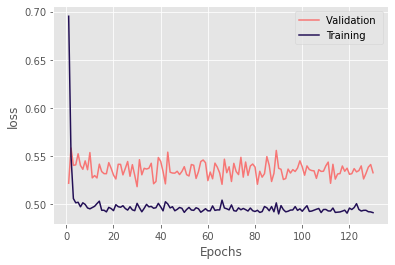

********** Successfully loaded weights from weights_030_0.51834.hdf5 file **********


In [5]:
h = model.fit(data=data)

In [7]:
test_x, test_y = model.test_data(data=data)

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 2)


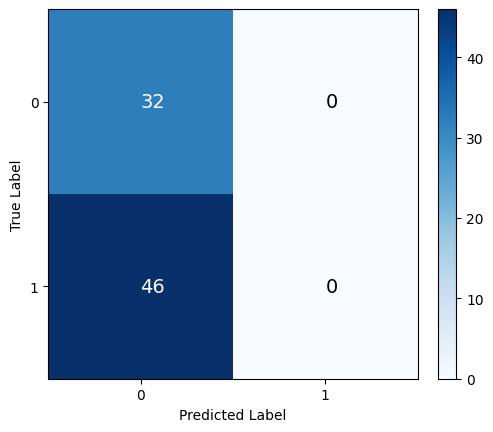

invalid value encountered in true_divide
invalid value encountered in true_divide


In [9]:
p = model.predict(x=test_x, y=test_y, verbose=0)